## Exercise 6.5 Unsupervised Machine Learning: Clustering

## Contents:

1. Import Libraries
2. Loading and Checking the Data
3. Data Cleaning, Manipulations, and Reprocessing
4. The Elbow Technique
5. Make an Informed Decision about Number of Clusters
6. Run the K-means Algorithm
7. Attach Cluster Labels to the Dataframe
8. Create Visualizations of the Clustered Data
9. Discuss the Clusters
10. Calculate Descriptive Statistics for Clusters
11. How the K-means Clustering Results Can be Useful
12. Exporting the Dataframe

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pylab as pl

# 2. Loading and Checking the Data

In [2]:
# Define the path to the data files
path = r'C:\Users\rajkaran\Documents\CareerFoundry- Data Analytics Program\2. Data Immersion\Achievements 6 - Tasks\3. Data\Prepared Data'

In [3]:
print(path)

C:\Users\rajkaran\Documents\CareerFoundry- Data Analytics Program\2. Data Immersion\Achievements 6 - Tasks\3. Data\Prepared Data


In [4]:
# Import the clean covid data
df_cov_19 = pd.read_csv(os.path.join(path,'cleaned_covid_final.csv'), index_col = False)

In [5]:
# Checking the dataset is correctly loaded
print(df_cov_19.head())
print(df_cov_19.info())
df_cov_19.shape

            Data As Of           Start Date             End Date  Year  Month  \
0  2023-09-24 00:00:00  2020-01-01 00:00:00  2020-01-31 00:00:00  2020    1.0   
1  2023-09-24 00:00:00  2020-02-01 00:00:00  2020-02-29 00:00:00  2020    2.0   
2  2023-09-24 00:00:00  2020-03-01 00:00:00  2020-03-31 00:00:00  2020    3.0   
3  2023-09-24 00:00:00  2020-04-01 00:00:00  2020-04-30 00:00:00  2020    4.0   
4  2023-09-24 00:00:00  2020-05-01 00:00:00  2020-05-31 00:00:00  2020    5.0   

     State       Condition Group                Condition ICD10_codes  \
0  Alabama  Respiratory diseases  Influenza and pneumonia     J09-J18   
1  Alabama  Respiratory diseases  Influenza and pneumonia     J09-J18   
2  Alabama  Respiratory diseases  Influenza and pneumonia     J09-J18   
3  Alabama  Respiratory diseases  Influenza and pneumonia     J09-J18   
4  Alabama  Respiratory diseases  Influenza and pneumonia     J09-J18   

  Age Group  COVID-19 Deaths  Number of Mentions Flag  
0      0-24       

(430560, 13)

# 3. Data Cleaning, Manipulations, and Reprocessing

In [6]:
# Drop non-numeric columns
df_cov_19_numeric = df_cov_19.select_dtypes(include=[np.number])

In [7]:
# Verify non-numeric columns are dropped
print(df_cov_19_numeric.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430560 entries, 0 to 430559
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                430560 non-null  int64  
 1   Month               430560 non-null  float64
 2   COVID-19 Deaths     430560 non-null  float64
 3   Number of Mentions  430560 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 13.1 MB
None


In [8]:
# Select relevant features for clustering
features = df_cov_19_numeric[['COVID-19 Deaths', 'Number of Mentions']]

In [9]:
# Verify selection
print(features.head())

   COVID-19 Deaths  Number of Mentions
0              0.0                 0.0
1              0.0                 0.0
2              0.0                 0.0
3              0.0                 0.0
4              0.0                 0.0


In [10]:
# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [11]:
# Verify standardization
print(pd.DataFrame(scaled_features, columns=features.columns).head())

   COVID-19 Deaths  Number of Mentions
0         -0.20215           -0.206311
1         -0.20215           -0.206311
2         -0.20215           -0.206311
3         -0.20215           -0.206311
4         -0.20215           -0.206311


# 4. The Elbow Technique

In [12]:
# Using the elbow technique with the negative inertia (score) method
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]
score = [kmeans[i].fit(scaled_features).score(scaled_features) for i in range(len(kmeans))]

score

C:\Users\rajkaran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rajkaran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rajkaran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rajkaran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rajkaran\anaconda3\Lib\site-package

[-861119.9999995063,
 -411572.7753964481,
 -233783.5903417416,
 -149817.7223598074,
 -104458.73756173467,
 -74379.80383141263,
 -57368.7649573302,
 -44877.29367499084,
 -37758.08704886889]

Text(0.5, 1.0, 'Elbow Curve')

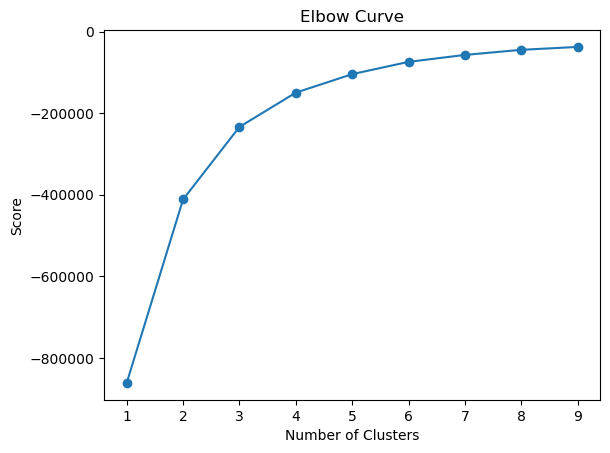

In [37]:
# Plot the elbow method graph with pylab
pl.plot(num_cl,score, marker='o')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')

In [29]:
# Define the path to the Visualizations folder
path1 = r'C:\Users\rajkaran\Documents\CareerFoundry- Data Analytics Program\2. Data Immersion\Achievements 6 - Tasks'

In [30]:
print(path1)

C:\Users\rajkaran\Documents\CareerFoundry- Data Analytics Program\2. Data Immersion\Achievements 6 - Tasks


In [38]:
# Export the elbow method graph to the "Visualizations" folder
file_name = os.path.join(path1, '5. Visualizations', 'elbow_method_pylab.png')
pl.savefig(file_name)

<Figure size 640x480 with 0 Axes>

In [39]:
pl.show()

# 5. Make an Informed Decision about Number of Clusters

Based on the elbow plot, the optimal number of clusters appears to be 4 because the curve starts to flatten around 4 clusters.

# 6. Run the K-means Algorithm

In [17]:
# Apply the K-means algorithm to the standardized data with the chosen number of clusters, 4
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=18, n_init=10)

# 7. Attach Cluster Labels to the Dataframe

In [18]:
# Add the cluster labels to the original dataframe and to the subset
df_cov_19['Cluster'] = kmeans.fit_predict(scaled_features)
df_cov_19_numeric['Cluster'] = kmeans.fit_predict(scaled_features)

In [19]:
# Verify cluster assignment
print(df_cov_19_numeric.head())

   Year  Month  COVID-19 Deaths  Number of Mentions  Cluster
0  2020    1.0              0.0                 0.0        0
1  2020    2.0              0.0                 0.0        0
2  2020    3.0              0.0                 0.0        0
3  2020    4.0              0.0                 0.0        0
4  2020    5.0              0.0                 0.0        0


# 8. Create Visualizations of the Clustered Data

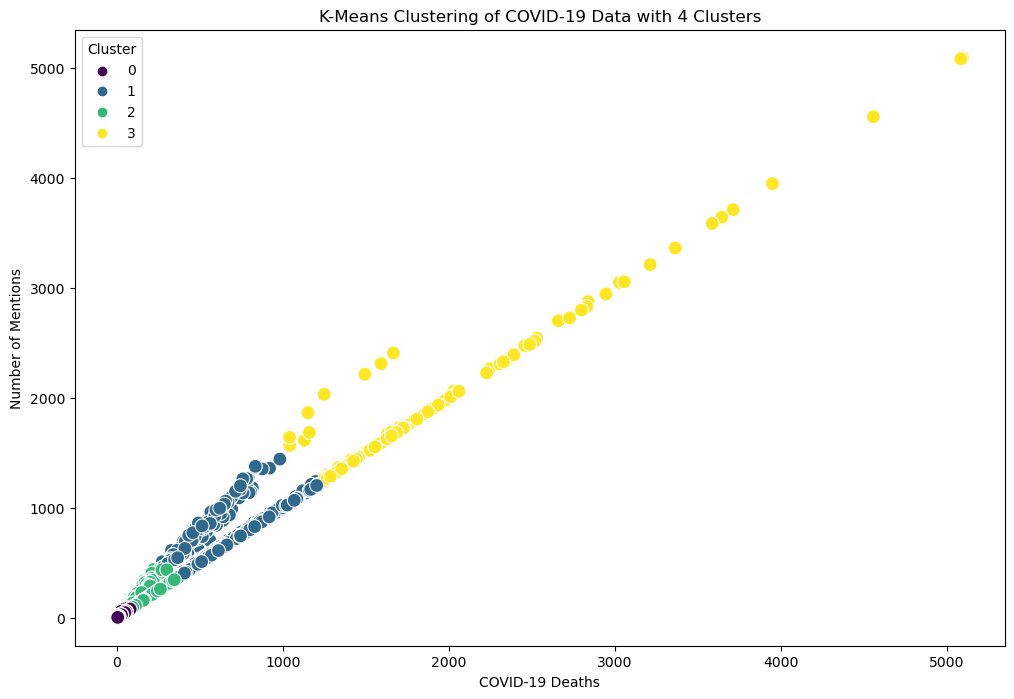

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\rajkaran\\Documents\\CareerFoundry- Data Analytics Program\\2. Data Immersion\\Achievements 6 - Tasks\\04 Analysis\\5. Visualizations\\kmeans_clustering.png'

<Figure size 640x480 with 0 Axes>

In [20]:
# Plotting the clusters of COVID-19 Deaths and Number of Mentions
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_cov_19_numeric, x='COVID-19 Deaths', y='Number of Mentions', hue='Cluster', palette='viridis', s=100)
plt.title('K-Means Clustering of COVID-19 Data with 4 Clusters')
plt.xlabel('COVID-19 Deaths')
plt.ylabel('Number of Mentions')
plt.legend(title='Cluster')
plt.show()

# Export the scatterplot of clusters
file_name = os.path.join(path1, '04 Analysis', '5. Visualizations', 'kmeans_clustering.png')
plt.savefig(file_name)

## Perform additional k-means clustering analyses focusing on the top 5 conditions identified in the previous exercises:
    Influenza and pneumonia
    Vascular and unspecified dementia
    Ischemic heart disease
    Diabetes
    Renal failure

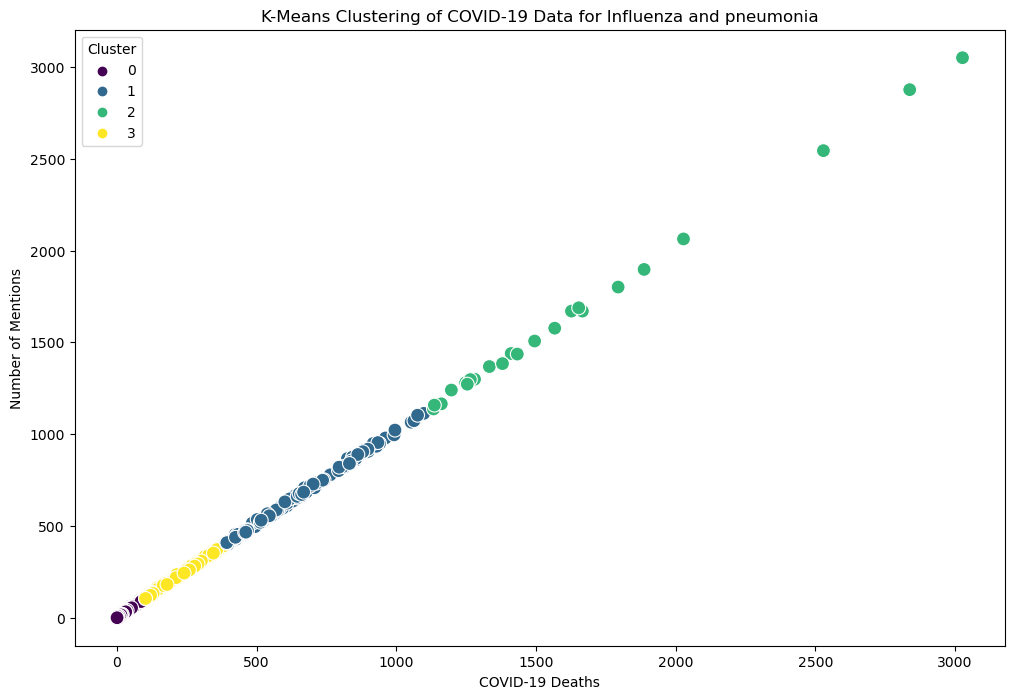

<Figure size 640x480 with 0 Axes>

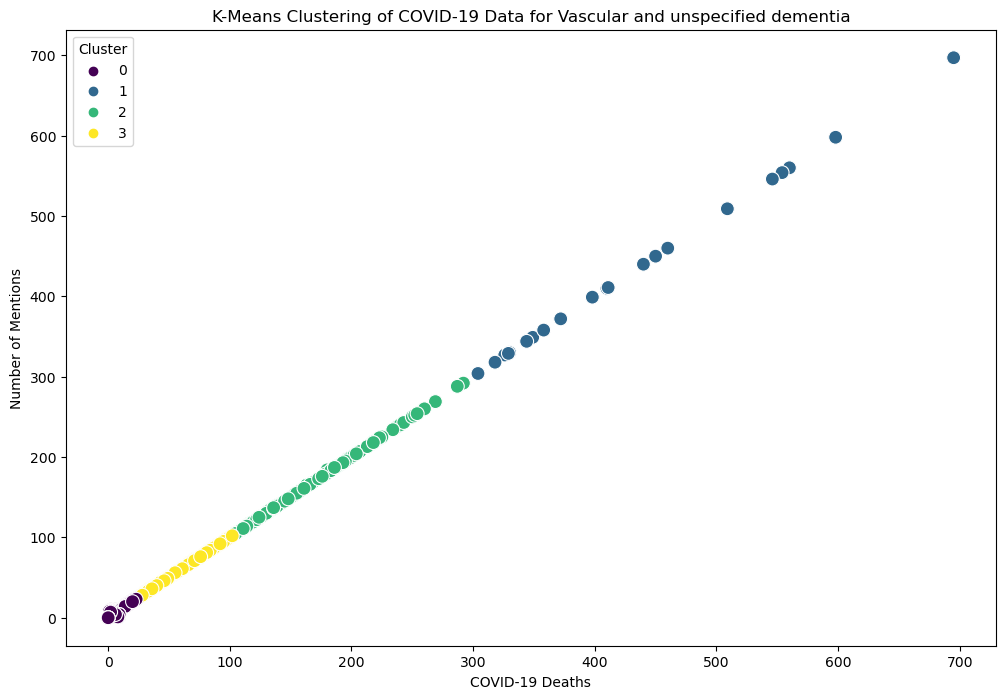

<Figure size 640x480 with 0 Axes>

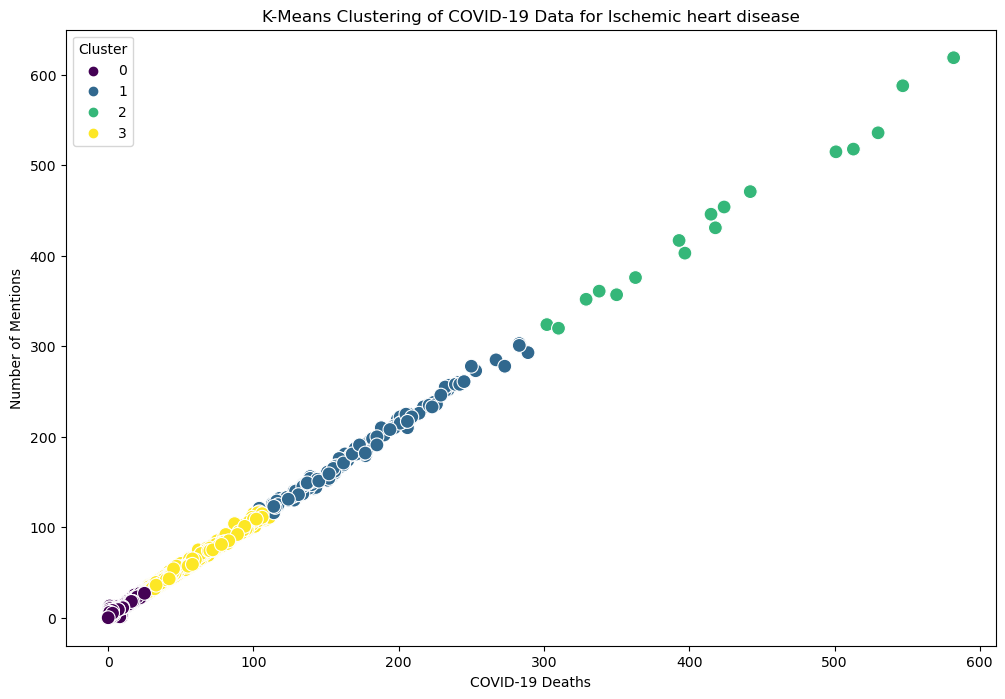

<Figure size 640x480 with 0 Axes>

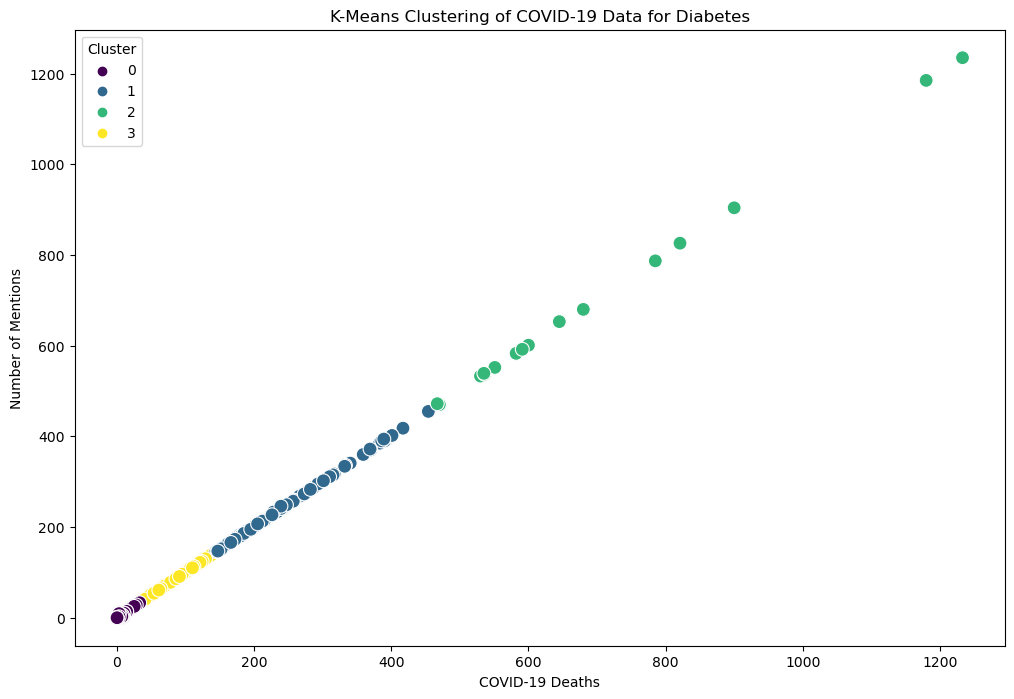

<Figure size 640x480 with 0 Axes>

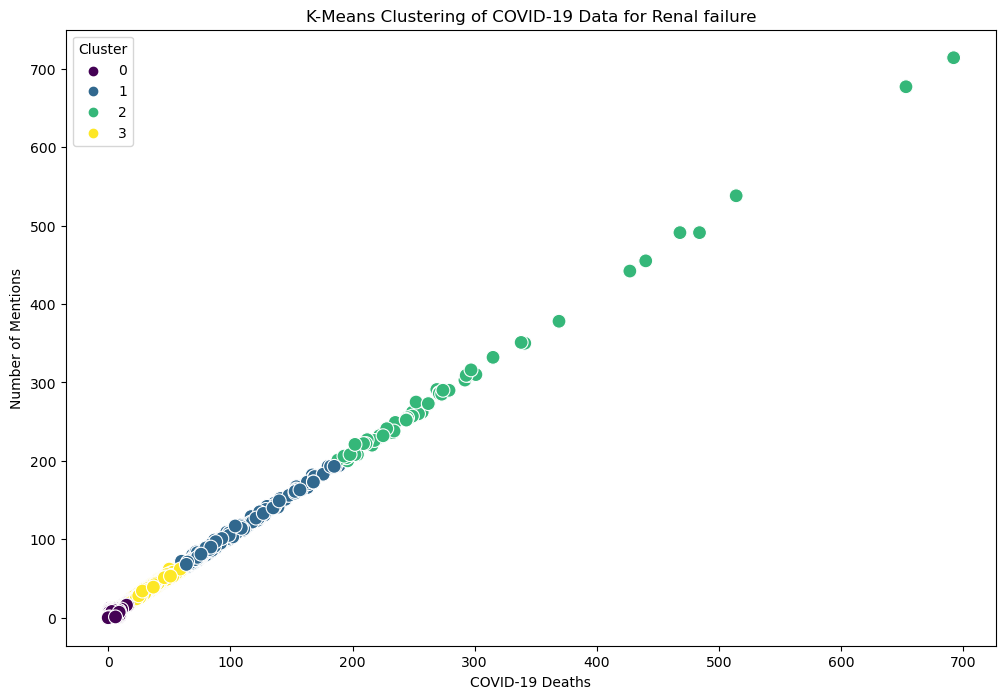

<Figure size 640x480 with 0 Axes>

In [21]:
# # Filter the dataset to include only the selected conditions
top_conditions = ['Influenza and pneumonia', 'Vascular and unspecified dementia', 'Ischemic heart disease', 'Diabetes', 'Renal failure']

# Loop through each condition, runniing the k-means clustering analysis and creating scatterplots
for condition in top_conditions:
    # Filter the dataset for the specific condition
    df_condition = df_cov_19[df_cov_19['Condition'] == condition].copy()
    
    # Select relevant features for clustering
    features_condition = df_condition[['COVID-19 Deaths', 'Number of Mentions']]
    
    # Standardize the data
    scaled_features_condition = scaler.fit_transform(features_condition)
             
    # Run K-Means algorithm using optimal clusters = 4
    kmeans_condition = KMeans(n_clusters=optimal_clusters, random_state=18, n_init=10)
    df_condition.loc[:, 'Cluster'] = kmeans_condition.fit_predict(scaled_features_condition)
        
    # Scatterplot for the specific condition
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df_condition, x='COVID-19 Deaths', y='Number of Mentions', hue='Cluster', palette='viridis', s=100)
    plt.title(f'K-Means Clustering of COVID-19 Data for {condition}')
    plt.xlabel('COVID-19 Deaths')
    plt.ylabel('Number of Mentions')
    plt.legend(title='Cluster')
    plt.show()
        
    # Export the scatter plot
    file_name = os.path.join(path1, '5. Visualizations', f'kmeans_clustering_{condition.replace(" ", "_").lower()}.png')
    plt.savefig(file_name)

# 9. Discuss the Clusters

### The clusters make sense as they group data points with similar numbers of COVID-19 Deaths and Number of Mentions. Cluster 0 is the largest, indicating most data points have low numbers of deaths and mentions. Clusters 1 and 2 represent groups with increasing numbers of deaths and mentions, and cluster 3 is between clusters 0 and 1 indicating a moderate number of deaths and mentions.
### The clusters can be interpreted meaningfully in the context of COVID-19 impact:
    Cluster 0 represents minimal impact
    Cluster 3 represents moderate impact
    Cluster 1 represents high impact
    Cluster 2 represents very high impact

# 10. Calculate Descriptive Statistics for Clusters

In [22]:
# Descriptive stats for clusters
cluster_stats = df_cov_19_numeric.groupby('Cluster').agg(['count', 'mean', 'std', 'min', 'max'])
print(cluster_stats)

           Year                                      Month            \
          count         mean       std   min   max   count      mean   
Cluster                                                                
0        419520  2021.412898  1.086691  2020  2023  419520  6.195035   
1          1198  2020.762104  0.734176  2020  2023    1198  6.030885   
2          9712  2020.930704  0.807133  2020  2023    9712  6.450062   
3           130  2020.715385  0.637760  2020  2022     130  5.100000   

                             COVID-19 Deaths                                   \
              std  min   max           count         mean         std     min   
Cluster                                                                         
0        3.328141  1.0  12.0          419520     5.498796   10.734437     0.0   
1        4.310026  1.0  12.0            1198   585.340568  203.765626   272.0   
2        4.079149  1.0  12.0            9712   149.049012   70.048374    50.0   
3        

## Interpretation of Descriptive Statistics:
### Variability and Spread: The standard deviation values indicate that there is considerable variability within clusters, especially in Clusters 1 and 2, which have high variability in COVID-19 deaths and mentions. 
### Comparison Across Clusters: The mean values of COVID-19 deaths and mentions increase progressively from Cluster 0 to Cluster 2, highlighting the gradient of COVID-19 impact across different clusters. 

# 11. How the K-means Clustering Results Can be Useful

### The k-means clustering analysis can be useful in multiple future steps in an analytics pipeline. For example, by using cluster labels as new features in feature engineering or by incorporating these labels into predictive modeling to improve the accuracy and context-awareness of the models. Additionally, creating visualizations and reports based on cluster differences can enhance the communication of insights and lead to better informed decision-making.

In [23]:
# Final check of the "merged_data" dataframe before exporting
print(df_cov_19.head())
print(df_cov_19.info())
df_cov_19.shape

            Data As Of           Start Date             End Date  Year  Month  \
0  2023-09-24 00:00:00  2020-01-01 00:00:00  2020-01-31 00:00:00  2020    1.0   
1  2023-09-24 00:00:00  2020-02-01 00:00:00  2020-02-29 00:00:00  2020    2.0   
2  2023-09-24 00:00:00  2020-03-01 00:00:00  2020-03-31 00:00:00  2020    3.0   
3  2023-09-24 00:00:00  2020-04-01 00:00:00  2020-04-30 00:00:00  2020    4.0   
4  2023-09-24 00:00:00  2020-05-01 00:00:00  2020-05-31 00:00:00  2020    5.0   

     State       Condition Group                Condition ICD10_codes  \
0  Alabama  Respiratory diseases  Influenza and pneumonia     J09-J18   
1  Alabama  Respiratory diseases  Influenza and pneumonia     J09-J18   
2  Alabama  Respiratory diseases  Influenza and pneumonia     J09-J18   
3  Alabama  Respiratory diseases  Influenza and pneumonia     J09-J18   
4  Alabama  Respiratory diseases  Influenza and pneumonia     J09-J18   

  Age Group  COVID-19 Deaths  Number of Mentions Flag  Cluster  
0      0-

(430560, 14)

# 12. Exporting the Dataframe

In [24]:
# Export the "df_cov_19" dataframe to CSV
df_cov_19.to_csv(os.path.join(path, 'clustered_covid_data.csv'), index=False)